<a href="https://colab.research.google.com/github/tavva-srinivas/Medical-Image-Classification/blob/main/IIT2022232.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
''' Do not change this cell '''
#Functions

def check_gpu():
  if tf.test.gpu_device_name() != '':
    print("GPU sucessfully connected")
  else: print("PLease connect GPU")

def check_data():
  a = set()
  for Image in Images:
    a.add(Image.shape[2])
  if len(a)==1 and len(Images)==624:
    print("PASS")
  else: print("FAIL")

In [1]:
#Import any library here only.
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import image_dataset_from_directory
import pandas as pd
import zipfile
import os
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import image_dataset_from_directory
from keras.applications import VGG16
from keras.metrics import AUC
from keras.optimizers import Adam

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/OpenCodeData.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

## <font color='orange'>Task #1</font>

Data loading and understanding data

In [ ]:
#Setup and check a gpu connection.

In [ ]:
''' Do not change this cell '''
check_gpu()

GPU sucessfully connected


In [ ]:
#Create two lists, images and labels. Store Input images in 'Images' list and its labels in 'Labels' list.
#Infected Images have two categories viral and bacterial. Find Number of images in each class. (Hint: See image name)
#Note that images are of different sizes.



In [ ]:
Images = []
labels = []

virus_count = 0
bacteria_count = 0

images_infected = os.listdir("/content/OpenCodeData/OpenCodeData/INFECTED")
images_normal = os.listdir("/content/OpenCodeData/OpenCodeData/NORMAL")

for i in images_infected:
  img_path = os.path.join("/content/OpenCodeData/OpenCodeData/INFECTED",i)
  labels.append(i.split('_')[1])
  if i.split('_')[1] == "virus":
    virus_count += 1
  else:
    bacteria_count += 1
  img = cv2.imread(img_path)
  img = cv2.resize(img,(900,900))
  Images.append(img)


for i in images_normal:
  img_path = os.path.join("/content/OpenCodeData/OpenCodeData/NORMAL",i)
  img = cv2.imread(img_path)
  img = cv2.resize(img,(900,900))
  Images.append(img)
  labels.append("normal")

print("Virus count :",virus_count)
print("Bacteria count :",bacteria_count)


Virus count : 148
Bacteria count : 242


In [ ]:
len(images_normal)

234

In [ ]:
len(images_infected)

390

In [ ]:
''' Do not change this cell '''
check_data()

PASS


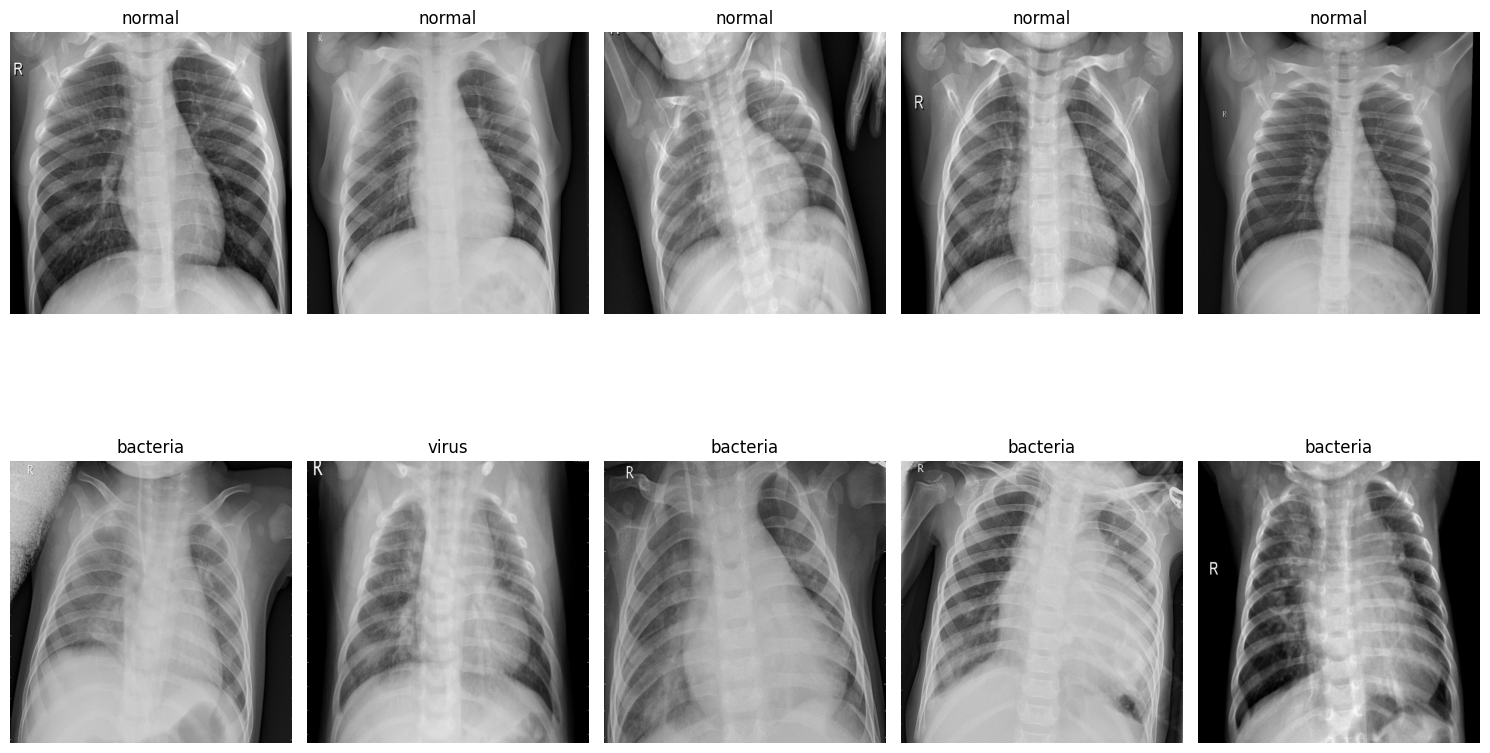

In [ ]:
#Plot 5 images each of normal and infected category.
#Also do neccessary labelings. Make sure your plots have all necessary details and looks good :)
#You can customise your plots as per your wish.

fig, axs = plt.subplots(2, 5, figsize=(15, 10))
for i in range(1,6):
    # Normal image
    axs[0][i-1].imshow(Images[-i])
    axs[0][i-1].axis('off')
    axs[0][i-1].set_title(labels[-i])

    # Infected image
    axs[1][i-1].imshow(Images[i])
    axs[1][i-1].axis('off')
    axs[1][i-1].set_title(labels[i])

plt.tight_layout()
plt.show()


In [ ]:
!pip install nbmerge

  Preparing metadata (setup.py) ... done
  Created wheel for nbmerge: filename=nbmerge-0.0.4-py2.py3-none-any.whl size=6393 sha256=c55858bb76ab08b45a49a850438f490b18ff27d71f7c808b55025f398a2ed820
  Stored in directory: /root/.cache/pip/wheels/ab/6a/28/a33b228ce3eda9a7cc2cfd050b24752d09ac76a13733738df5
Successfully built nbmerge


In [ ]:
!nbmerge "/content/drive/MyDrive/Colab Notebooks/IIT2022232.ipynb" "/content/drive/MyDrive/Colab Notebooks/Copy of Task2.ipynb" > merged_notebook.ipynb


**Copy this task at end of task #1 notebook**

In [ ]:
# Copy and run the code you wrote in task 1 notebook here


## <font color='orange'>Task #2</font>

Data Augmentation

Here I have attached an resource if you find difficuties in dealing with imbalanced data: [Click here](https://www.geeksforgeeks.org/imbalanced-learn-module-in-python/)

Image augmentation and Pre-Processing:
*  [Resource 1](https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/)
*  [Resource 2](https://www.analyticsvidhya.com/blog/2023/03/getting-started-with-image-processing-using-opencv/)

**Ofcourse you may use other techniques of your choice :)**

** Keep note that pre-proceesing and augmentation play crucial role in building good models

[0 1] [234 390]


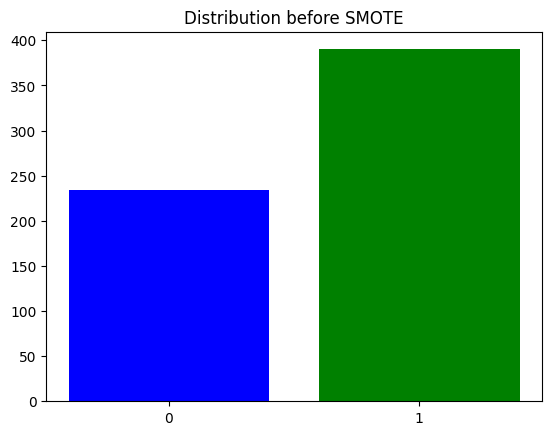

In [ ]:
#Deal with unbalanced data

'''
    Now condider only two categories "Normal" and "Infected".
'''

# 0 --> Normal , 1 --> Infected

new_labels = []

for i in labels:
  if i == "normal":
    new_labels.append(0)
  else:
    new_labels.append(1)

label,freq = np.unique(new_labels,return_counts=True)

new_labels = np.array(new_labels)
Images = np.array(Images)

print(label,freq)

plt.xticks(label)
plt.bar(label,freq, color=['blue', 'green'])
plt.title('Distribution before SMOTE')
plt.show()



[0 1] [390 390]


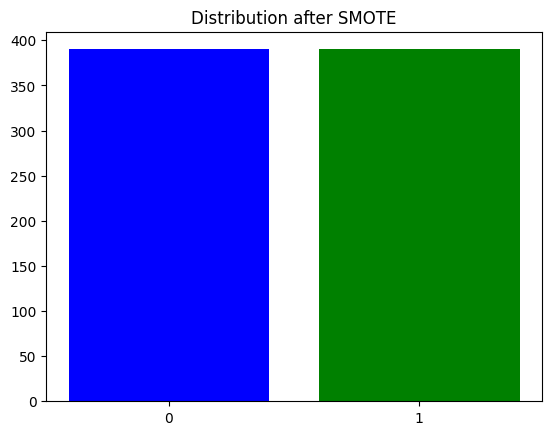

In [ ]:
# Pre-process images here.

# Oversampling --> Overfitting && Undersampling --> Loss of data
# So SMOTE is better option

x_smote, y_smote = SMOTE().fit_resample(Images.reshape(Images.shape[0],900*900*3), new_labels)
label,freq = np.unique(y_smote,return_counts = True)

print(label,freq)

plt.xticks(label)
plt.bar(label,freq, color=['blue', 'green'])
plt.title('Distribution after SMOTE')
plt.show()




In [ ]:
new_images = x_smote.reshape(x_smote.shape[0],900,900,3)

entries = np.arange(new_images.shape[0])
np.random.shuffle(entries)

shuffled_images = new_images[entries]
shuffled_labels = y_smote[entries]


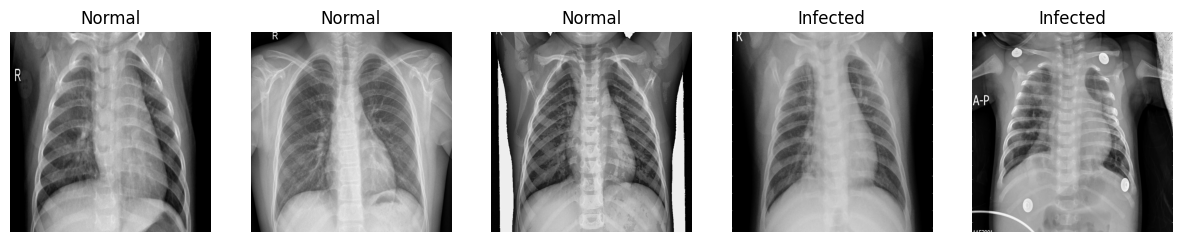

In [ ]:
# Plot 5 pre-processed image

fig , axs = plt.subplots(1,5,figsize=(15,3))

for i,ax in enumerate(axs):
  ax.imshow(shuffled_images[i])
  if shuffled_labels[i] == 0:
    ax.set_title("Normal")
  else:
    ax.set_title("Infected")
  ax.axis('off')


In [ ]:
# Split images into train, validation and test.

x_train,x_test,y_train,y_test = train_test_split(shuffled_images,shuffled_labels,test_size=0.25)


In [ ]:
# Saving images and then loading otherwise I am getting resources error due to insufficient RAM

drive_directory = '/content/drive/MyDrive/Balanced_data_opencode/'

train_directory = os.path.join(drive_directory, 'train/')
test_directory = os.path.join(drive_directory, 'test/')
os.makedirs(train_directory, exist_ok=True)
os.makedirs(test_directory, exist_ok=True)

# Function to save images to directories (RAM is not sufficient)
def save_images_to_directory(images, labels, directory):
    for i, (image, label) in enumerate(zip(images, labels)):
        # Creating subdirectory based on the label
        subdirectory = os.path.join(directory, str(label))
        os.makedirs(subdirectory, exist_ok=True)

        filename = f'image_{i}_label_{label}.png'
        filepath = os.path.join(subdirectory, filename)

        plt.imsave(filepath, image)

save_images_to_directory(x_train, y_train, train_directory)

save_images_to_directory(x_test, y_test, test_directory)

In [ ]:
# Do required image augmentation on train data here.

data_generation_xtrain = ImageDataGenerator(
    zoom_range = 0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 0.3,
    rescale = 1./255,
    brightness_range = [0.7,1.4],
    rotation_range = 20,
    fill_mode='nearest'
)


train_data_generator = data_generation_xtrain.flow_from_directory(
    "/content/drive/MyDrive/Balanced_data_opencode/train",
    target_size=(900,900),
    batch_size = 16,
    class_mode='binary',
    save_format='jpeg' )

Found 585 images belonging to 2 classes.


In [ ]:
num_images_to_generate = 200
for i in range(num_images_to_generate):
    batch_images, labels = next(train_data_generator)

    for j in range(len(labels)):
        filename = f'aug_image_{i * train_data_generator.batch_size + j}_{labels[j]}.jpeg'

        # Save the image
        image_path = os.path.join("/content/drive/MyDrive/AugmentedImages", filename)
        keras.preprocessing.image.save_img(image_path, batch_images[j])


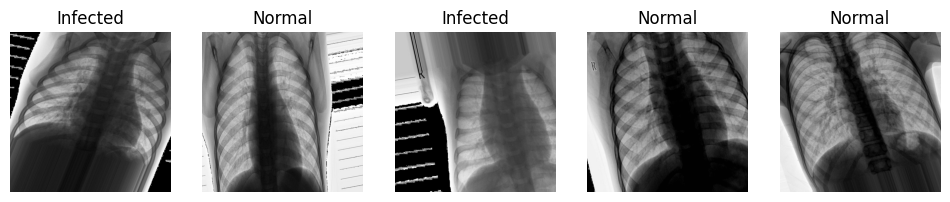

In [ ]:
# Plot 5 augmented train image

fig, axs = plt.subplots(1,5,figsize = (12,5))

for i, filename in enumerate(os.listdir("/content/drive/MyDrive/AugmentedImages")[:5]):
    file_path = os.path.join("/content/drive/MyDrive/AugmentedImages", filename)

    img = cv2.imread(file_path)
    axs[i].imshow(img*255)
    if filename.split('_')[3].split('.')[0] == "1":
       axs[i].set_title("Infected")
    else:
       axs[i].set_title("Normal")
    axs[i].axis('off')


**Copy this task at end of task #2 notebook**

In [ ]:
!pip install nbmerge
!nbmerge "/content/drive/MyDrive/Colab Notebooks/IIT2022232-Task 2(ii).ipynb" "/content/drive/MyDrive/Colab Notebooks/Task3.ipynb" > "task3com.ipynb"

## <font color='orange'>Task #3</font>

Build and Training model

Aim to increase accuracy and AUC score

Note: Accuracy of your model also depend on how you have <font color='orange'>pre-processed</font> your data along with model architecture. Hence results of your CNN is highly dependent on Task #2

This is <font color='red'>binary</font> classification task. Classifying images into <font color='yellow'>normal and infected</font>

In [9]:
images = []
label = []
image_path = "/content/OpenCodeData/OpenCodeData"
for i in ["INFECTED","NORMAL"]:
  file_list = os.listdir(image_path + f"/{i}")

  for file_name in file_list:
    full_path = os.path.join(image_path+ f"/{i}", file_name)
    img = cv2.imread(full_path)
    img = cv2.resize(img,(256,256))
    images.append(img)
    if i == "INFECTED":
      label.append(1)
    else:
      label.append(0)

images = np.array(images)
label = np.array(label)

entries = np.arange(images.shape[0])
np.random.shuffle(entries)

shuffled_images = images[entries]
shuffled_labels = label[entries]



[0 1] [390 390]


<BarContainer object of 2 artists>

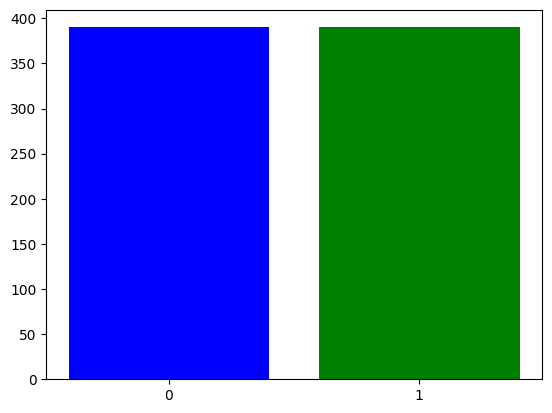

In [10]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
x_over, y_over = oversample.fit_resample(shuffled_images.reshape(shuffled_images.shape[0],256*256*3), shuffled_labels)
label,freq = np.unique(y_over,return_counts = True)

print(label,freq)

plt.xticks(label)
plt.bar(label,freq, color=['blue', 'green'])

In [13]:
# Split images into train, validation and test.

x_train,x_test_val,y_train,y_test_val = train_test_split(x_over,y_over,test_size=0.25)
x_test,x_val,y_test,y_val = train_test_split(x_test_val,y_test_val,test_size=0.4)

print(len(x_train))
print(len(x_test))
print(len(x_val))

585
117
78


In [12]:
# Saving images and then loading otherwise I am getting resources error due to insufficient RAM

drive_directory = '/content/drive/MyDrive/bal_data/'

train_directory = os.path.join(drive_directory, 'train/')
test_directory = os.path.join(drive_directory, 'test/')
val_directory = os.path.join(drive_directory,"val/")
os.makedirs(train_directory, exist_ok=True)
os.makedirs(test_directory, exist_ok=True)


# Function to save images to directories (RAM is not sufficient)
def save_images_to_directory(images, labels, directory):
    for i, (image, label) in enumerate(zip(images, labels)):
        # Creating subdirectory based on the label
        subdirectory = os.path.join(directory, str(label))
        os.makedirs(subdirectory, exist_ok=True)

        filename = f'image_{i}_label_{label}.png'
        filepath = os.path.join(subdirectory, filename)

        plt.imsave(filepath, image)

save_images_to_directory(x_train.reshape(x_train.shape[0],256,256,3), y_train, train_directory)

save_images_to_directory(x_test.reshape(x_test.shape[0],256,256,3), y_test, test_directory)

save_images_to_directory(x_val.reshape(x_val.shape[0],256,256,3),y_val,val_directory)

In [ ]:
# generators
data_generation_from_train_data = ImageDataGenerator(
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rescale = 1./255,
    rotation_range = 8,
    fill_mode='nearest'
)

data_generaation_from_test_data = ImageDataGenerator(
    rescale=1./255
)

# Augmentation
train_data = data_generation_from_train_data.flow_from_directory(
    "/content/drive/MyDrive/bal_data/train",
    target_size = (256,256),
    class_mode = "binary",
    batch_size = 12
)

val_data = data_generaation_from_test_data.flow_from_directory(
    "/content/drive/MyDrive/bal_data/val",
    target_size = (256,256),
    class_mode = "binary",
    batch_size = 12
)

#Create a CNN.
#Use accuracy and ROC-AUC matices.

model = Sequential([
    Conv2D(32, kernel_size=(3,3), padding="valid", activation="relu",input_shape=(256, 256, 3)),
    Conv2D(32, kernel_size=(3,3), padding="valid", activation="relu",input_shape=(256, 256, 3)),
    # BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),


    Conv2D(64, kernel_size=(3,3), activation="relu"),
    Conv2D(64, kernel_size=(3,3), activation="relu"),
    # BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"),

    Conv2D(64, kernel_size=(3,3), activation="relu"),
    Conv2D(64, kernel_size=(3,3), activation="relu"),
    # BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"),

    Conv2D(128, kernel_size=(3,3), padding="valid", activation="relu"),
    Conv2D(128, kernel_size=(3,3), padding="valid", activation="relu"),
    # BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"),

    Flatten(),
    Dense(64, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.compile(Adam(learning_rate = 0.0005), loss='binary_crossentropy', metrics=['accuracy', AUC()])

#Run model here.
history = model.fit(train_data,epochs=30,validation_data=val_data)


Found 878 images belonging to 2 classes.
Found 78 images belonging to 2 classes.
Epoch 1/30
74/74 [==============================] - 326s 4s/step - loss: 0.6936 - accuracy: 0.4954 - auc: 0.4802 - val_loss: 0.6931 - val_accuracy: 0.4872 - val_auc: 0.5000
Epoch 2/30
74/74 [==============================] - 19s 250ms/step - loss: 0.6935 - accuracy: 0.5137 - auc: 0.5087 - val_loss: 0.6910 - val_accuracy: 0.5128 - val_auc: 0.7316
Epoch 3/30
74/74 [==============================] - 19s 259ms/step - loss: 0.7020 - accuracy: 0.5159 - auc: 0.5445 - val_loss: 0.6786 - val_accuracy: 0.8462 - val_auc: 0.9227
Epoch 4/30
74/74 [==============================] - 20s 262ms/step - loss: 0.6300 - accuracy: 0.6913 - auc: 0.7267 - val_loss: 0.6695 - val_accuracy: 0.5128 - val_auc: 0.8375
Epoch 5/30
74/74 [==============================] - 19s 254ms/step - loss: 0.5618 - accuracy: 0.7665 - auc: 0.8193 - val_loss: 0.5305 - val_accuracy: 0.7051 - val_auc: 0.9122
Epoch 6/30
74/74 [============================

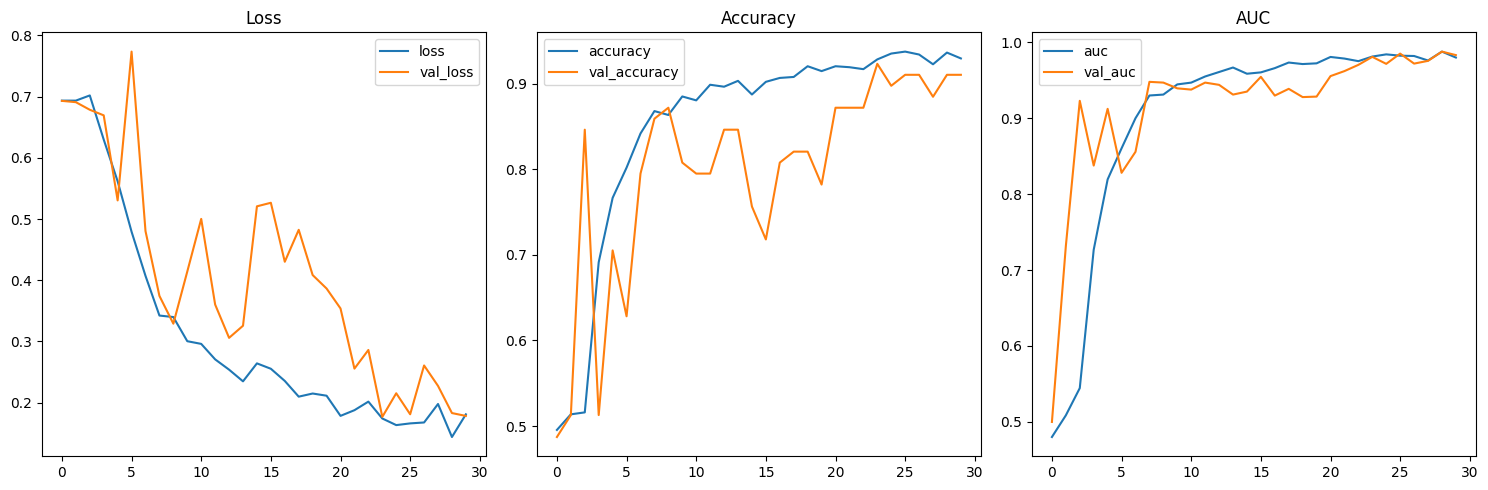

In [ ]:
'''Plot 3 graphs showing progress over each epoch -

       loss vs validation loss
       accurracy vs validation accuracy
       AUC score vs Validation AUC score.
'''
#There should be proper labelling of graphs, show legends.

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot loss and val_loss
axes[0].plot(history.history["loss"], label="loss")
axes[0].plot(history.history["val_loss"], label="val_loss")
axes[0].set_title('Loss')
axes[0].legend()

# Plot accuracy and val_accuracy
axes[1].plot(history.history["accuracy"], label="accuracy")
axes[1].plot(history.history["val_accuracy"], label="val_accuracy")
axes[1].set_title('Accuracy')
axes[1].legend()

# Assuming you have 'auc' and 'val_auc' in your history dictionary
axes[2].plot(history.history["auc"], label="auc")
axes[2].plot(history.history["val_auc"], label="val_auc")
axes[2].set_title('AUC')
axes[2].legend()

plt.tight_layout()
plt.show()

Take care of underfitting and overfitting. Even if your model has better matrices score, but under or overfitting may lead to rejection of PR

In [ ]:
from sklearn.metrics import accuracy_score

#Test model here.

x_test = []
label = []

base_url = "/content/drive/MyDrive/bal_data/test"

file_list = os.listdir(base_url+f"/{i}")

for i in ["0","1"]:
  file_list = os.listdir(base_url+f"/{i}")
  for file_name in file_list:
      full_path = os.path.join(base_url+f"/{i}", file_name)
      img = cv2.imread(full_path)
      x_test.append(img)
      label.append(int(i))

x_test = np.array(x_test)
print(x_test.shape)

predictions = model.predict(x_test/255.0)
predictions

threshold = 0.4  # You can adjust this threshold as needed
binary_predictions = (predictions > threshold).astype('int')

binary_predictions

accuracy = accuracy_score(label, binary_predictions)  # replace binary_predictions with your actual predictions

print(f"Accuracy: {accuracy*100:.2f}")


(168, 256, 256, 3)
6/6 [==============================] - 0s 51ms/step
Accuracy: 93.45


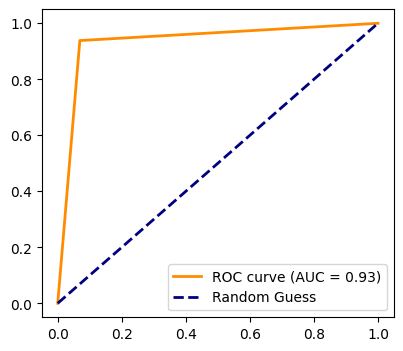

In [ ]:
fpr, tpr, thresholds = roc_curve(label, binary_predictions)
roc_auc = auc(fpr, tpr)

fig = plt.figure(figsize = (10,4))

# Plot ROC curve
plt.subplot(1,2,1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.legend()

Make sure to save your best model (.h5 format)

In [ ]:
model.save('/content/drive/MyDrive/Saved_models/open_code_image_classification/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Accuracy: 93.45


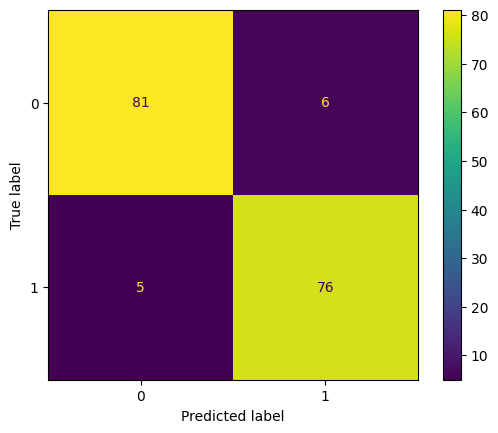

In [ ]:
#Plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

cm = confusion_matrix(label,binary_predictions)
cm = ConfusionMatrixDisplay(cm)
print(f"Accuracy: {accuracy*100:.2f}")
cm.plot()

In [ ]:
!pip install nbmerge
!nbmerge "/content/drive/MyDrive/Colab Notebooks/task3_completed.ipynb" "/content/drive/MyDrive/Colab Notebooks/Copy of Task4.ipynb" > merged_task4


  Preparing metadata (setup.py) ... done
  Created wheel for nbmerge: filename=nbmerge-0.0.4-py2.py3-none-any.whl size=6393 sha256=f54386658610d61289be63380188ea6ae4dc587da40e8eb56e0ea5d8037b3799
  Stored in directory: /root/.cache/pip/wheels/ab/6a/28/a33b228ce3eda9a7cc2cfd050b24752d09ac76a13733738df5
Successfully built nbmerge


**Copy this task at end of task #3 notebook**

In [2]:
#Import any library here only.
from keras.applications import ResNet50, VGG16
from keras.utils import plot_model

## <font color='orange'>Task #4</font>

Finetuning a pre-trained model and then train it

Aim to increase accuracy and AUC score

58889256/58889256 [==============================] - 0s 0us/step


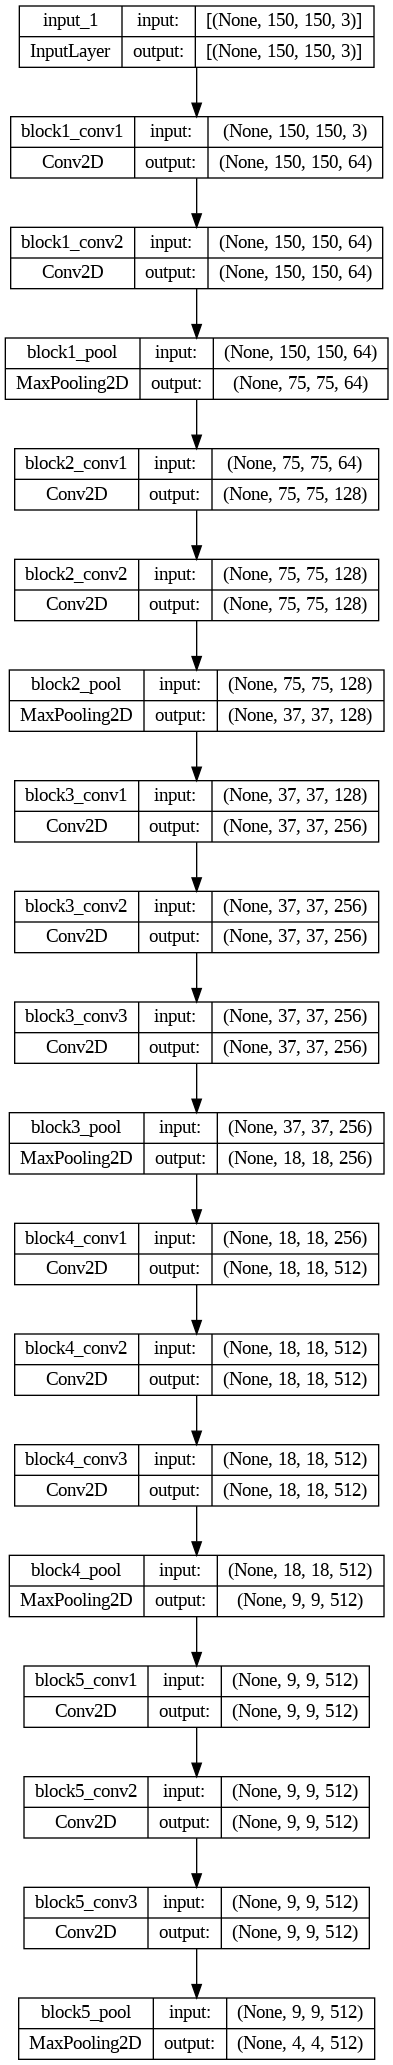

In [3]:
# Use any pretrained model resnet/EfficientNet/VGG etc. and finetune them.
#Perform all task in task3.

base_model = VGG16(input_shape=(256,256,3), include_top=False, weights="imagenet")
plot_model(base_model,show_shapes = True)

In [3]:
from keras import layers
from keras.applications.vgg16 import preprocess_input


train_data = []
train_labels = []

test_data = []
test_labels = []

val_data = []
val_labels = []

base_url = "/content/drive/MyDrive/bal_data"

for j in ["train","test","val"]:
  for i in ["0","1"]:
    file_list = os.listdir(base_url+f"/{j}"+f"/{i}")
    for file_name in file_list:
        full_path = os.path.join(base_url+f"/{j}"+f"/{i}", file_name)
        img = cv2.imread(full_path)
        if j == "train":
            train_data.append(cv2.imread(full_path))
            if i == "0" :
              train_labels.append(0)
            else:
              train_labels.append(1)
        elif j == "test":
            test_data.append(cv2.imread(full_path))
            if i == "0" :
              test_labels.append(0)
            else:
              test_labels.append(1)
        elif j == "val":
            val_data.append(cv2.imread(full_path))
            if i == "0" :
              val_labels.append(0)
            else:
              val_labels.append(1)

train_data = np.array(train_data)
# train_data = tf.cast(train_data/255. ,tf.float32)

test_data = np.array(test_data)
# test_data = tf.cast(test_data/255. ,tf.float32)

val_data = np.array(val_data)
# val_data = tf.cast(val_data/255. , tf.float32)

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)
val_labels = np.array(val_labels)


training_data = preprocess_input(train_data)
testing_data = preprocess_input(test_data)
validation_data = preprocess_input(val_data)

print(train_data.shape)
print(test_data.shape)
print(val_data.shape)

(585, 256, 256, 3)
(117, 256, 256, 3)
(78, 256, 256, 3)


In [4]:
base_model = VGG16(input_shape=(256,256,3), include_top=False, weights="imagenet")

x = layers.Flatten()(base_model.output)

x = layers.Dense(128, activation='relu')(x)

x = layers.Dropout(0.1)(x)

x = layers.Dense(32, activation='relu')(x)

x = layers.Dense(1, activation='sigmoid')(x)

model = keras.models.Model(base_model.input, x)

model.compile(
    loss = 'binary_crossentropy',
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['accuracy',AUC()]
)

vgg_history = model.fit( training_data, train_labels ,epochs = 30,validation_data = (validation_data,val_labels))

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/30
19/19 [==============================] - 55s 1s/step - loss: 6.9509 - accuracy: 0.5675 - auc: 0.5742 - val_loss: 0.6935 - val_accuracy: 0.4872 - val_auc: 0.8414
Epoch 2/30
19/19 [==============================] - 9s 488ms/step - loss: 0.5720 - accuracy: 0.7060 - auc: 0.7800 - val_loss: 0.5089 - val_accuracy: 0.7308 - val_auc: 0.9178
Epoch 3/30
19/19 [==============================] - 9s 488ms/step - loss: 0.5546 - accuracy: 0.7692 - auc: 0.8093 - val_loss: 0.4805 - val_accuracy: 0.7821 - val_auc: 0.9260
Epoch 4/30
19/19 [==============================] - 9s 492ms/step - loss: 0.4696 - accuracy: 0.8154 - auc: 0.8618 - val_loss: 0.3484 - val_accuracy: 0.8462 - val_auc: 0.9401
Epoch 5/30
19/19 [==============================] - 10s 510ms/step - loss: 0.4678 - accuracy: 0.8359 - auc: 0.8762 - val_loss: 0.4054 - val_accuracy: 0.8205 - val_auc: 0.9424
Epoch 6/30
19/19 [==============================] - 10s 518ms/step

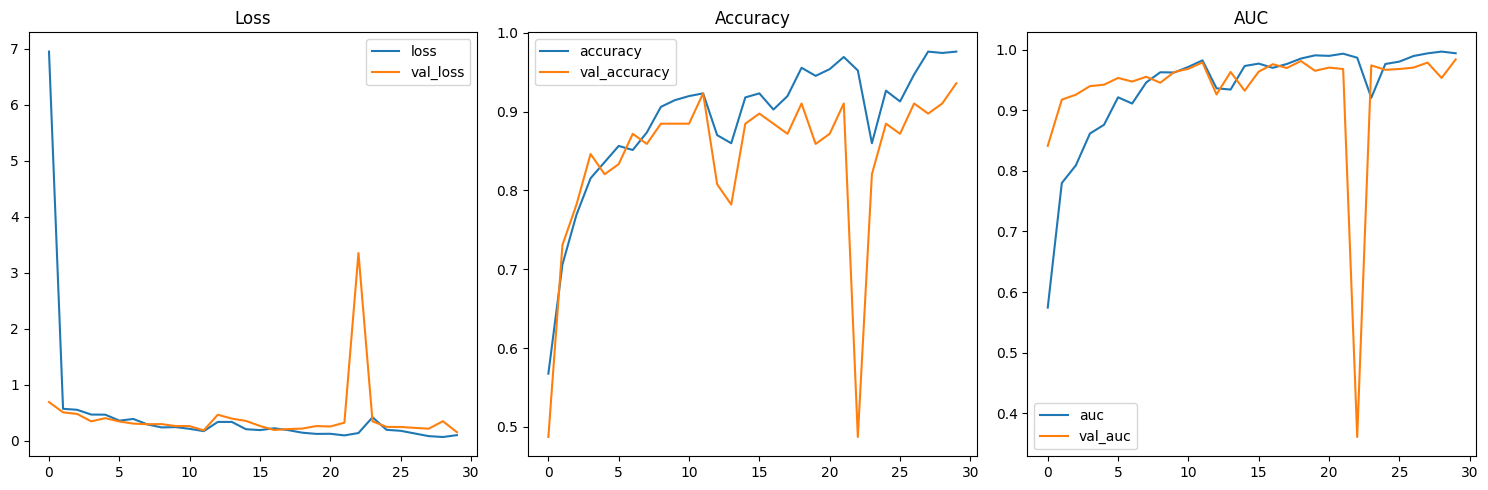

In [6]:
'''Plot 3 graphs showing progress over each epoch -

       loss vs validation loss
       accurracy vs validation accuracy
       AUC score vs Validation AUC score.
'''
#There should be proper labelling of graphs, show legends.

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot loss and val_loss
axes[0].plot(vgg_history.history["loss"], label="loss")
axes[0].plot(vgg_history.history["val_loss"], label="val_loss")
axes[0].set_title('Loss')
axes[0].legend()

# Plot accuracy and val_accuracy
axes[1].plot(vgg_history.history["accuracy"], label="accuracy")
axes[1].plot(vgg_history.history["val_accuracy"], label="val_accuracy")
axes[1].set_title('Accuracy')
axes[1].legend()

# Plot auc and val_auc
axes[2].plot(vgg_history.history["auc"], label="auc")
axes[2].plot(vgg_history.history["val_auc"], label="val_auc")
axes[2].set_title('AUC')
axes[2].legend()

plt.tight_layout()
plt.show()

In [11]:
from sklearn.metrics import accuracy_score

#Test model here.

x_test = []
label = []

base_url = "/content/drive/MyDrive/bal_data/test"

file_list = os.listdir(base_url+f"/{i}")

for i in ["0","1"]:
  file_list = os.listdir(base_url+f"/{i}")
  for file_name in file_list:
      full_path = os.path.join(base_url+f"/{i}", file_name)
      img = cv2.imread(full_path)
      x_test.append(img)
      label.append(int(i))

x_test = np.array(x_test)
print(x_test.shape)
x_test = preprocess_input(x_test)

predictions = model.predict(x_test)
predictions

threshold = 0.4  # You can adjust this threshold as needed
binary_predictions = (predictions > threshold).astype('int')

binary_predictions

accuracy = accuracy_score(label, binary_predictions)  # replace binary_predictions with your actual predictions

print(f"Accuracy: {accuracy*100:.2f}")


(117, 256, 256, 3)
4/4 [==============================] - 1s 173ms/step
Accuracy: 93.16


Accuracy: 93.16


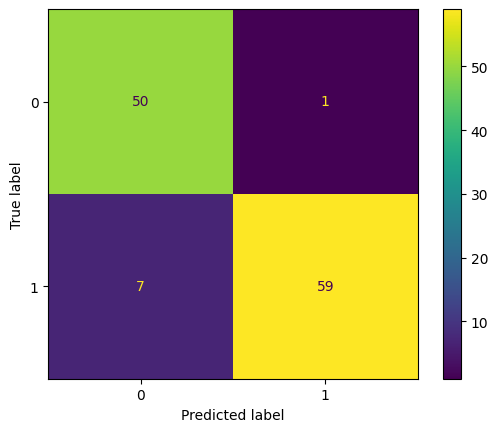

In [12]:
#Plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

cm = confusion_matrix(label,binary_predictions)
cm = ConfusionMatrixDisplay(cm)
print(f"Accuracy: {accuracy*100:.2f}")
cm.plot()

In [13]:
model.save('/content/drive/MyDrive/Saved_models/open_code_image_classification/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
